<a href="https://colab.research.google.com/github/thkang727/ML2022_practice/blob/main/decisiontree/decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

201724404_ 강태환. mushroom data set을 이용한 decisionTree 모델기반 머신러닝.

In [ ]:
#DecisionTree 사용.
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from google.colab import files
from sklearn.tree import export_graphviz
import graphviz

# EDA
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np


#UCI dataset 파일 다운로드 후, colunm 명 넣어서 재사용.
df = pd.read_csv('agaricus-lepiota.data', encoding='utf-8')

#data set 확인.
df.head(10)


,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


<data set 설명>
버섯에 대한 data set 을 선택했습니다. 해당 data set은 물리적 특성으로 버섯이 독성이 있는지, 식용이 가능한지를 분류한 data set 입니다. 해당 data set의 변수들은 다음과 같습니다.
1. cap-shape(모자 모양): bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface(모자 표면): fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color(모자 색상): brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises(타박상)?: bruises=t,no=f
5. odor(냄새): almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment(아가미 부착형태): attached=a,descending=d,free=f,notched=n
7. gill-spacing(아가미 간격): close=c,crowded=w,distant=d
8. gill-size(아가미 크기): broad=b,narrow=n
9. gill-color(아가미 색): black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape(줄기 모양): enlarging=e,tapering=t
11. stalk-root(줄기 뿌리): bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring(줄기 표면 위 링): fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring(줄기 표면 아래 링): fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring(줄기 위 링 색상): brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring(줄기 아래 링 색상): brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type(베일 유형): partial=p,universal=u
17. veil-color(베일 색상): brown=n,orange=o,white=w,yellow=y
18. ring-number(링 번호): none=n,one=o,two=t
19. ring-type(링 유형): cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color(포자 인쇄 색상): black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population(개체군): abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat(서식지): grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [ ]:
#df.info()
df.isnull().sum() #결측치 확인.

poisonous                   0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
#data 전처리
X = df.iloc[:,1:]
y = df.iloc[: , 0]

df.describe()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
#label encoding 방식 사용.
#dictionary 사용하여 문자 정수화.
capsh_dic={
    'b' : 1,
    'c' : 2,
    'x' : 3,
    'f' : 4,
    'k' : 5,
    's' : 6
}
capsur_dic={
    'f' : 1,
    'g' : 2,
    'y' : 3,
    's' : 4,
}
capcol_dic={
    'n' : 1,
    'b' : 2,
    'c' : 3,
    'g' : 4,
    'r' : 5,
    'p' : 6,
    'u' : 7,
    'e' : 8,
    'w' : 9,
    'y' : 10
}
bruises_dic={
    't' : 1,
    'f' : 2
}
odor_dic={
    'a' : 1,
    'l' : 2,
    'c' : 3,
    'y' : 4,
    'f' : 5,
    'm' : 6,
    'n' : 7,
    'p' : 8,
    's' : 9
}
gilat_dic={
    'a' : 1,
    'd' : 2,
    'f' : 3,
    'n' : 4
}
gilsp_dic={
    'c' : 1,
    'w' : 2,
    'd' : 3
}
gilsize_dic={
    'b' : 1,
    'n' : 2
}
gilcol_dic={
    'k' : 1,
    'n' : 2,
    'b' : 3,
    'h' : 4,
    'g' : 5,
    'r' : 6,
    'o' : 7,
    'p' : 8,
    'u' : 9,
    'e' : 10,
    'w' : 11,
    'y' : 12
}
stalksh_dic={
    'e' : 1,
    't' : 2
}

stalkroot_dic={
    'b' : 1,
    'c' : 2,
    'u' : 3,
    'e' : 4,
    'z' : 5,
    'r' : 6,
    '?' : 7
}
stalksurabo_dic={
    'f' : 1,
    'y' : 2,
    'k' : 3,
    's' : 4,
}
stalksurbel_dic={
    'f' : 1,
    'y' : 2,
    'k' : 3,
    's' : 4,
}
stalkcolabo_dic={
    'n' : 1,
    'b' : 2,
    'c' : 3,
    'g' : 4,
    'o' : 5,
    'p' : 6,
    'e' : 7,
    'w' : 8,
    'y' : 9
}
stalkcolbel_dic={
    'n' : 1,
    'b' : 2,
    'c' : 3,
    'g' : 4,
    'o' : 5,
    'p' : 6,
    'e' : 7,
    'w' : 8,
    'y' : 9
}
velitype_dic={
    'p' : 1,
    'u' : 2
}
velicol_dic={
    'n' : 1,
    'o' : 2,
    'w' : 3,
    'y' : 4
}
ring_num_dic={
    'n' : 1,
    'o' : 2,
    't' : 3
}
ring_type_dic={
    'c' : 1,
    'e' : 2,
    'f' : 3,
    'l' : 4,
    'n' : 5,
    'p' : 6,
    's' : 7,
    'z' : 8
}
spore_print_dic={
    'k' : 1,
    'n' : 2,
    'b' : 3,
    'h' : 4,
    'r' : 5,
    'o' : 6,
    'u' : 7,
    'w' : 8,
    'y' : 9
}
population_dic={
    'a' : 1,
    'c' : 2,
    'n' : 3,
    's' : 4,
    'v' : 5,
    'y' : 6
}
habitat_dic= {
    'g' : 1,
    'l' : 2,
    'm' : 3,
    'p' : 4,
    'u' : 5,
    'w' : 6,
    'd' : 7
}

y_dic={
    'p' : 0,
    'e' : 1
}


X['cap-shape'].unique()
X['cap-surface'].unique()
X['cap-color'].unique()
X['bruises'].unique()
X['odor'].unique()
X['gill-attachment'].unique()
X['gill-spacing'].unique()
X['gill-size'].unique()
X['gill-color'].unique()
X['stalk-shape'].unique()
X['stalk-root'].unique()
X['stalk-surface-above-ring'].unique()
X['stalk-surface-below-ring'].unique()
X['stalk-color-above-ring'].unique()
X['stalk-color-below-ring'].unique()
X['veil-type'].unique()
X['veil-color'].unique()
X['ring-number'].unique()
X['ring-type'].unique()
X['spore-print-color'].unique()
X['population'].unique()
X['habitat'].unique()

X['cap-shape']= X['cap-shape'].map(capsh_dic)
X['cap-surface']=X['cap-surface'].map(capsur_dic)
X['cap-color']=X['cap-color'].map(capcol_dic)
X['bruises']=X['bruises'].map(bruises_dic)
X['odor']=X['odor'].map(odor_dic)
X['gill-attachment']=X['gill-attachment'].map(gilat_dic)
X['gill-spacing']=X['gill-spacing'].map(gilsp_dic)
X['gill-size']=X['gill-size'].map(gilsize_dic)
X['gill-color']=X['gill-color'].map(gilcol_dic)
X['stalk-shape']=X['stalk-shape'].map(stalksh_dic)
X['stalk-root']=X['stalk-root'].map(stalkroot_dic)
X['stalk-surface-above-ring']=X['stalk-surface-above-ring'].map(stalksurabo_dic)
X['stalk-surface-below-ring']=X['stalk-surface-below-ring'].map(stalksurbel_dic)
X['stalk-color-above-ring']=X['stalk-color-above-ring'].map(stalkcolabo_dic)
X['stalk-color-below-ring']=X['stalk-color-below-ring'].map(stalkcolbel_dic)
X['veil-type']=X['veil-type'].map(velitype_dic)
X['veil-color']=X['veil-color'].map(velicol_dic)
X['ring-number']=X['ring-number'].map(ring_num_dic)
X['ring-type']=X['ring-type'].map(ring_type_dic)
X['spore-print-color']=X['spore-print-color'].map(spore_print_dic)
X['population']=X['population'].map(population_dic)
X['habitat']=X['habitat'].map(habitat_dic)

y_label=y.map(y_dic)

#train, test set 생성.
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size = 0.4, random_state=1)
X_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:204: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:206: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
4100,3,3,8,2,4,3,1,2,3,2,...,4,6,6,1,3,2,2,8,5,7
1013,4,4,1,2,7,3,2,1,2,2,...,1,8,8,1,3,2,2,1,4,1
5224,1,3,1,2,7,3,1,2,11,1,...,2,8,1,1,3,2,2,8,5,7
770,3,4,9,1,1,3,1,1,11,1,...,4,8,8,1,3,2,6,2,3,1
7838,1,1,4,2,7,3,2,1,5,1,...,3,8,8,1,3,3,6,8,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7935,5,3,8,2,4,3,1,2,3,2,...,4,8,8,1,3,2,2,8,5,7
5192,3,3,1,2,9,3,1,2,3,2,...,4,8,8,1,3,2,2,8,5,7
3980,4,3,4,2,5,3,1,1,8,1,...,3,2,1,1,3,2,4,4,5,1
235,3,1,9,1,2,3,2,2,11,2,...,4,8,8,1,3,2,6,2,5,7


In [ ]:
#Decisiontree model 생성
tree_model = DecisionTreeClassifier(max_depth = 5, max_leaf_nodes=4, min_samples_leaf=4)

tree_model.fit(X_train, y_train)
tree_model.score(X_test,y_test)

0.9458461538461539

<머신러닝 사용 기법>
Decision trees 기법으로 머신러닝 구현을 해보았습니다. Decision trees를 기법을 선택한 이유는 if-then 형식으로 되어 이해하기 쉬운 형태입니다. 나무형태의 그래프로 되어 해석력이 좋습니다. 그리고 모형에 대한 가정이 필요 없는 비모수적 방법입니다.

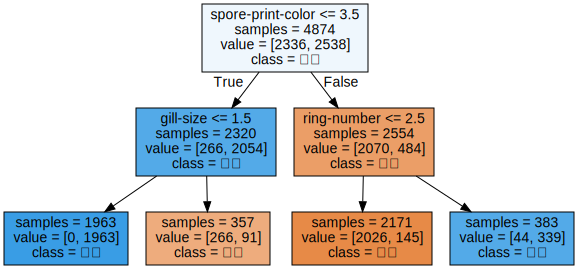

In [ ]:


export_graphviz(tree_model, out_file="tree.dot",
                class_names=["독성", "식용"],
                feature_names= X.columns,
                impurity = False, filled=True)

with open("tree.dot", encoding = "UTF8") as f:
  dot_graph = f.read()
  display(graphviz.Source(dot_graph))

<머신러닝 구현 및 결과 해석>
label encoding 방법을 사용하여 data 전처리를 하여 decision tree를 만들었습니다. 해당 모형을 통해 속성 중에 gill-size(아가미 크기), ring_number(링 수), spore-print-color(포자 인쇄 색상) 속성으로 트리를 만들었습니다. 아래에서 속성의 중요성을 나타내는 지표에서 알 수 있듯, 해당 3가지 지표가 버섯의 독성과 식용을 명확히 구분할 수 있음을 알 수 있었습니다.
decision tree에서 가장 중요성이 큰 순서대로 하여 spore-print-color(포자 인쇄 색상), ring_number(링 수), gill-size(아가미 크기) 순서대로 분류가 진행되었습니다.
spore-print-color<=3.5 이고, gill-size<=1.5 일때, 그리고 spore-print-color>3.5, ring>2.5 일때 식용입니다.  spore-print-color<=3.5 이고, gill-size>1.5 일때, 그리고 spore-print-color>3.5, ring<=2.5 일때 독성입니다. 

In [ ]:
fe = tree_model.feature_importances_
fe

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.17211382, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.2237592 , 0.        , 0.60412698,
       0.        , 0.        ])

In [ ]:
X.columns


Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [ ]:
indf = pd.DataFrame(fe, index=X.columns)
indf
#중요성이 0인 항목은 모형 생성 때 속성에서 삭제하고 봐도된다.

,0
cap-shape,0.000000
cap-surface,0.000000
cap-color,0.000000
bruises,0.000000
odor,0.000000
gill-attachment,0.000000
gill-spacing,0.000000
gill-size,0.172114
gill-color,0.000000
stalk-shape,0.000000
